In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
stop final relax at some point
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties fo

{'seed': 0, 'set_used_fixed_h': np.True_, 'set_fixed_h': 3.81, 'reduce_h_threshold': 1.0989388423533022e-05, 'reduce_h_amount': 0.001016527635528529}


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:59: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:91: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0, Trees 40, Best cost: 0.10144517, Est: 0.25361292, h: 3.810000


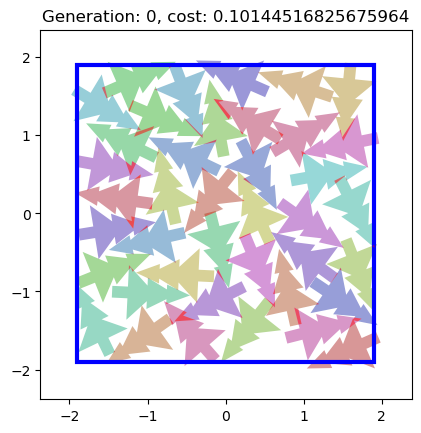

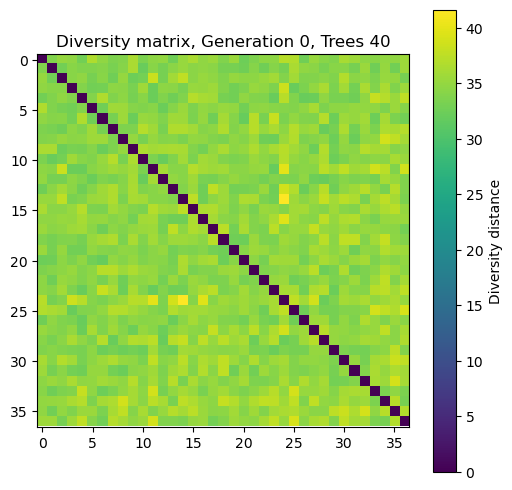

Generation 1, Trees 40, Best cost: 0.04587992, Est: 0.11469980, h: 3.810000


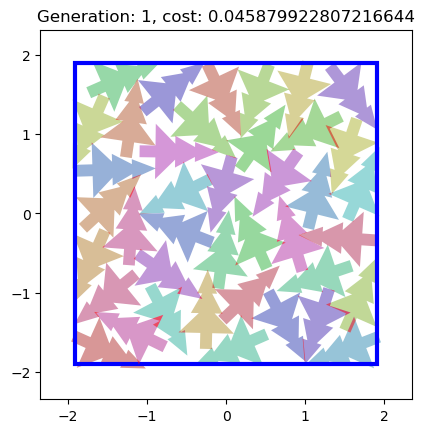

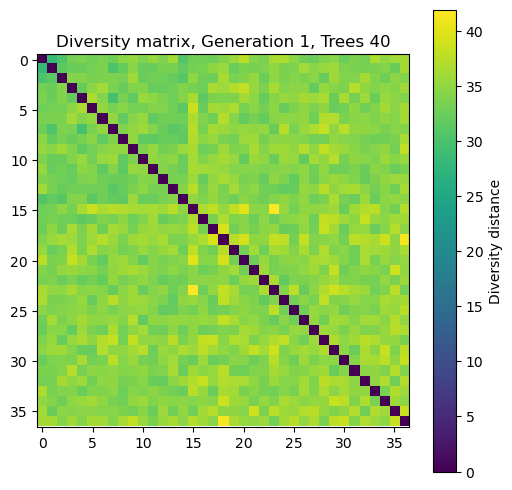

Generation 2, Trees 40, Best cost: 0.03138489, Est: 0.07846223, h: 3.810000


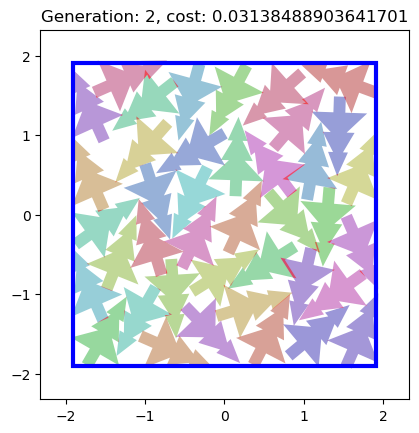

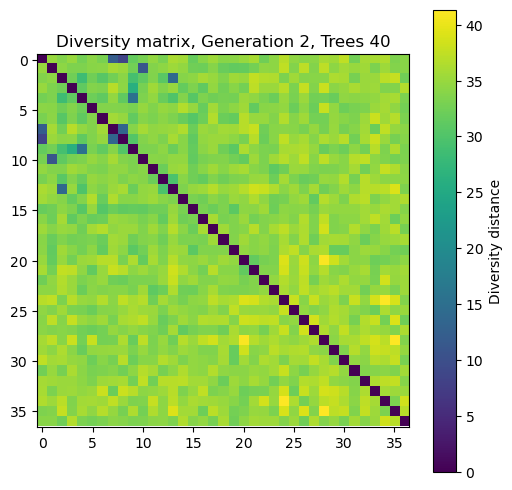

Generation 3, Trees 40, Best cost: 0.02186263, Est: 0.05465658, h: 3.810000


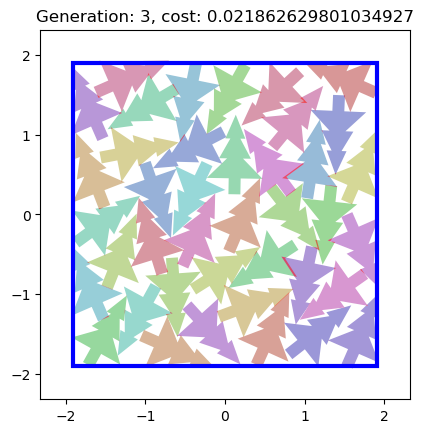

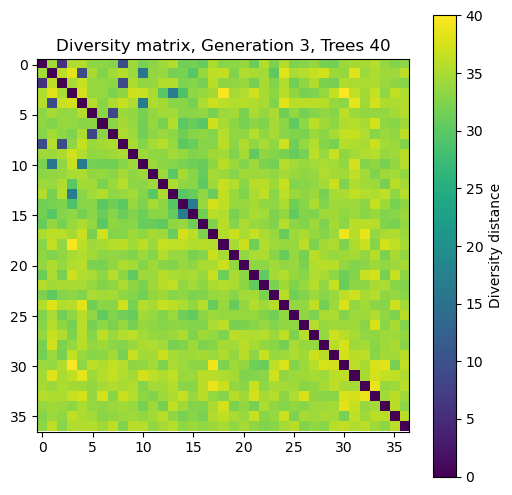

Generation 4, Trees 40, Best cost: 0.01878481, Est: 0.04696203, h: 3.810000


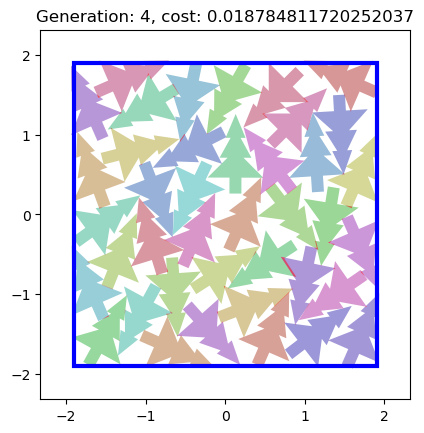

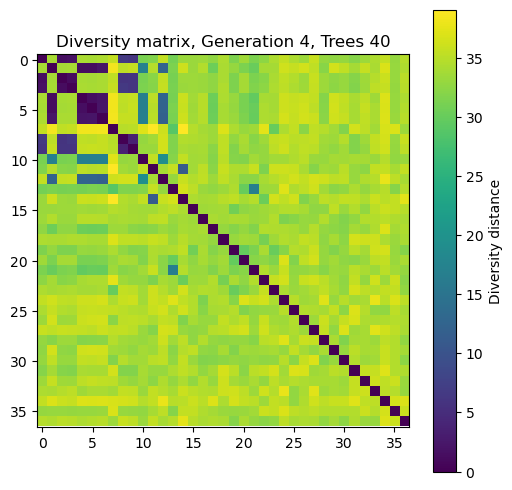

Generation 5, Trees 40, Best cost: 0.01467499, Est: 0.03668748, h: 3.810000


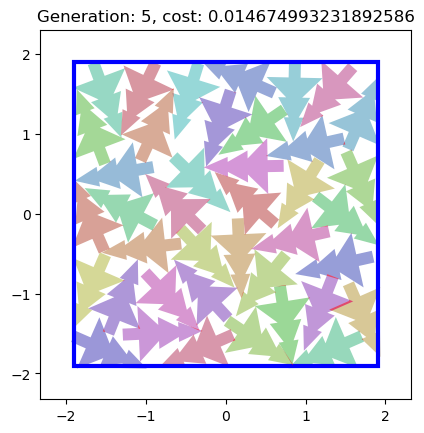

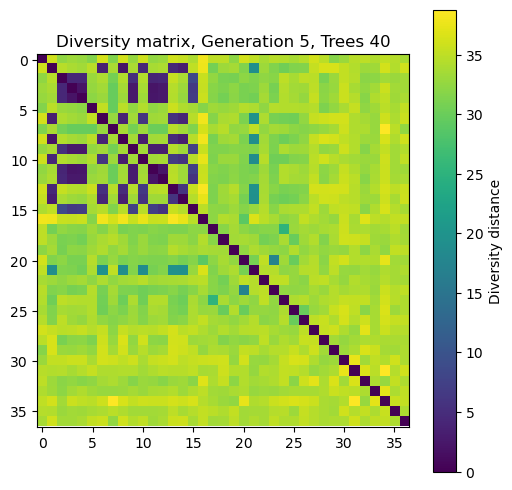

Generation 6, Trees 40, Best cost: 0.01369515, Est: 0.03423787, h: 3.810000


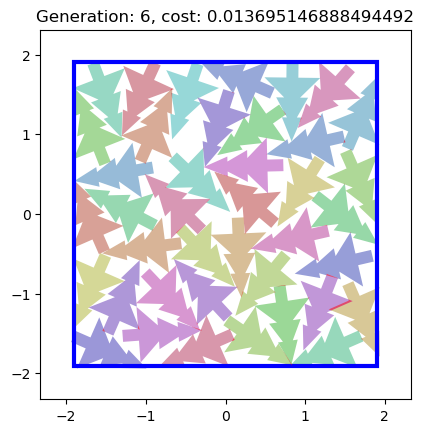

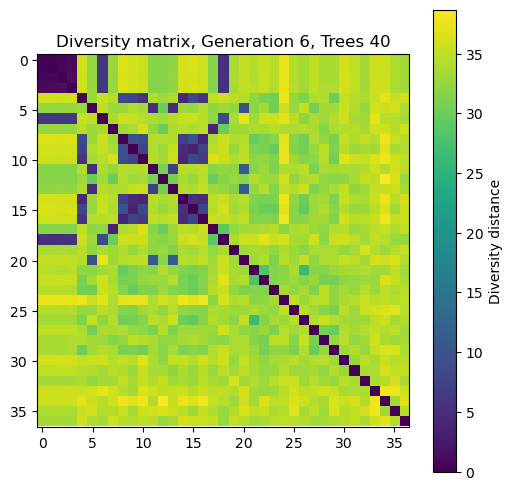

Generation 7, Trees 40, Best cost: 0.01321183, Est: 0.03302957, h: 3.810000


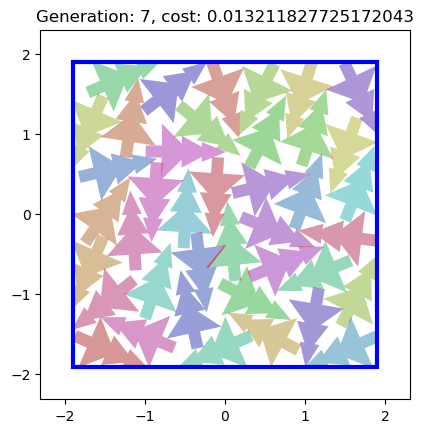

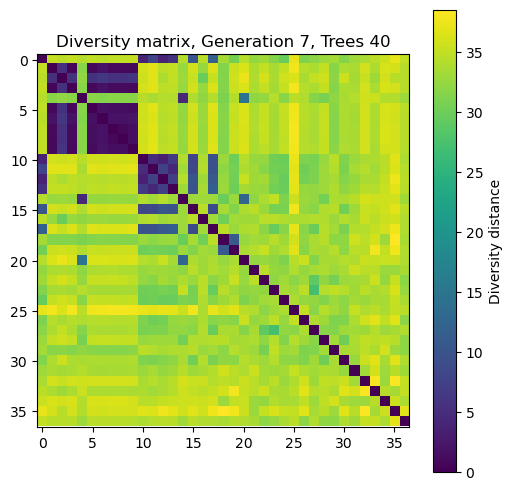

Generation 8, Trees 40, Best cost: 0.01177702, Est: 0.02944254, h: 3.810000


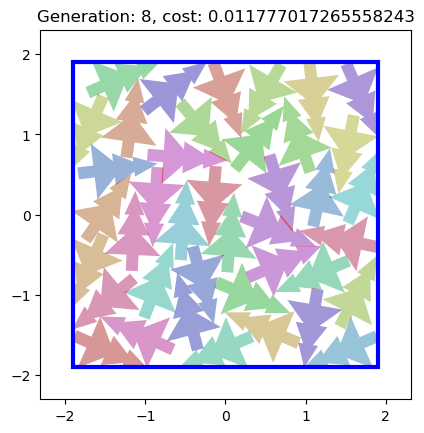

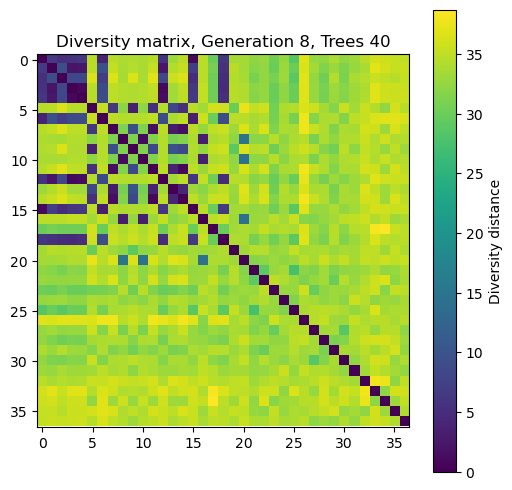

Generation 9, Trees 40, Best cost: 0.00954319, Est: 0.02385798, h: 3.810000


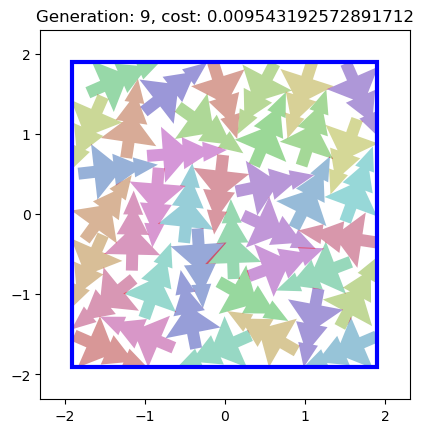

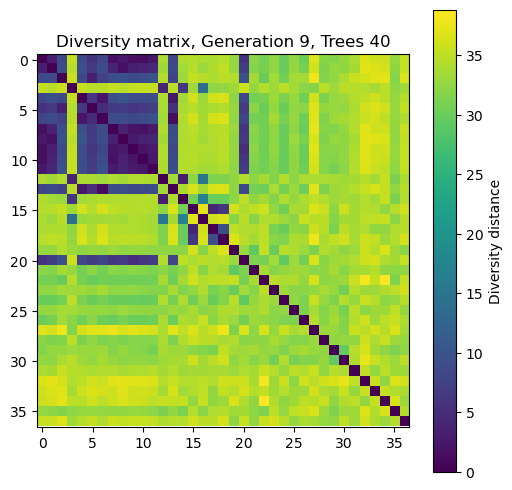

Generation 10, Trees 40, Best cost: 0.00844657, Est: 0.02111642, h: 3.810000


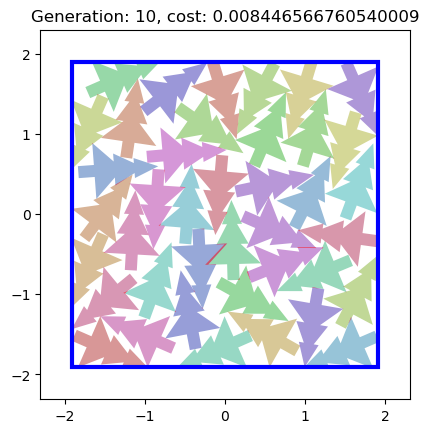

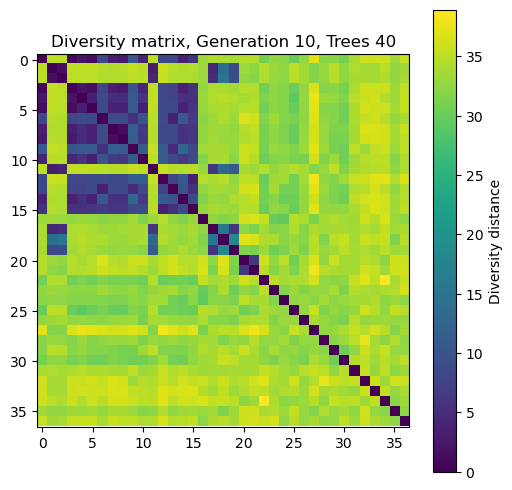

Generation 11, Trees 40, Best cost: 0.00814392, Est: 0.02035981, h: 3.810000


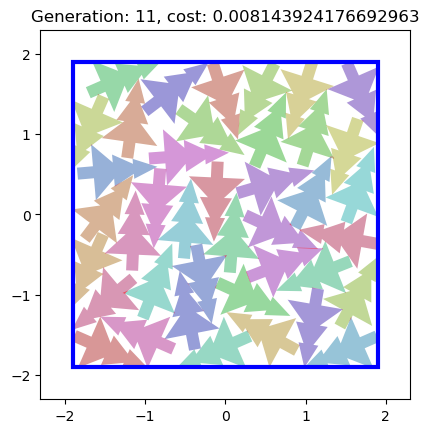

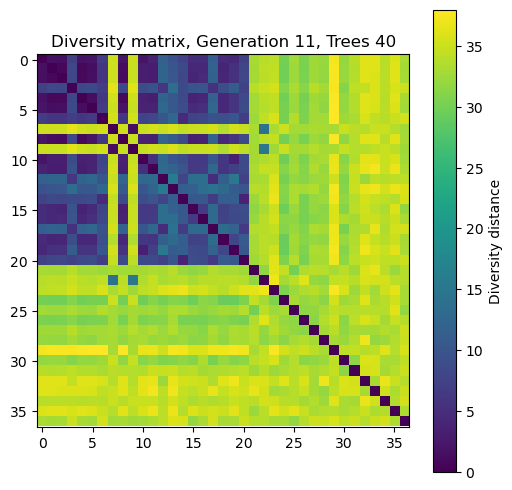

Generation 12, Trees 40, Best cost: 0.00590139, Est: 0.01475347, h: 3.810000


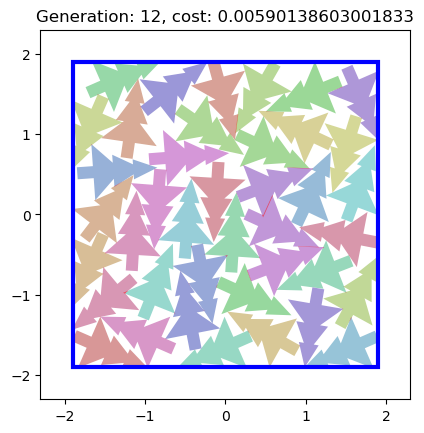

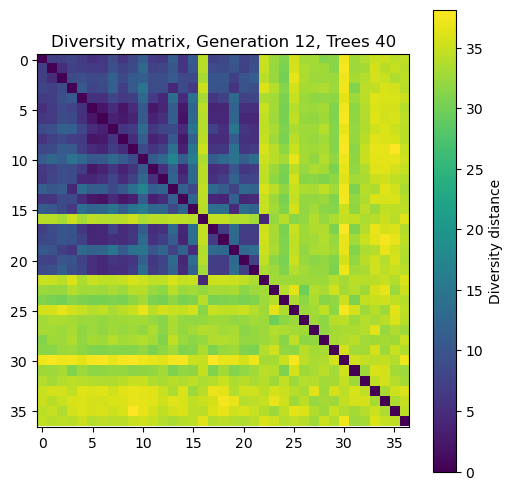

Generation 13, Trees 40, Best cost: 0.00562285, Est: 0.01405713, h: 3.810000


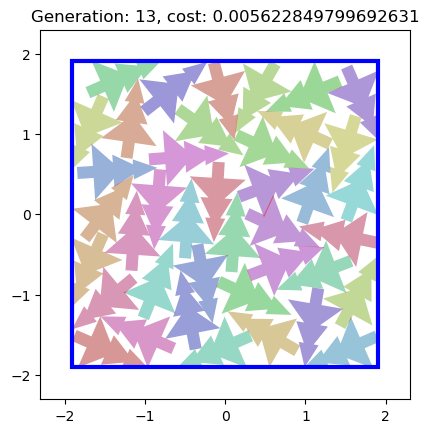

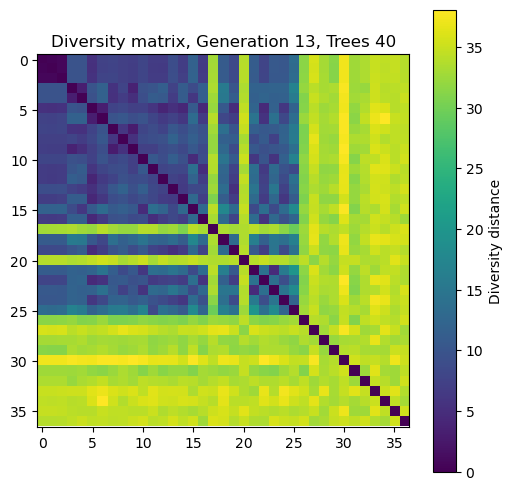

Generation 14, Trees 40, Best cost: 0.00337510, Est: 0.00843774, h: 3.810000


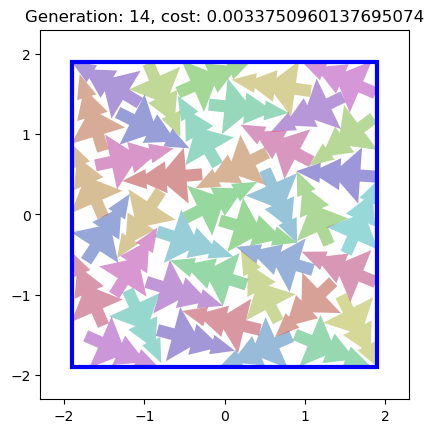

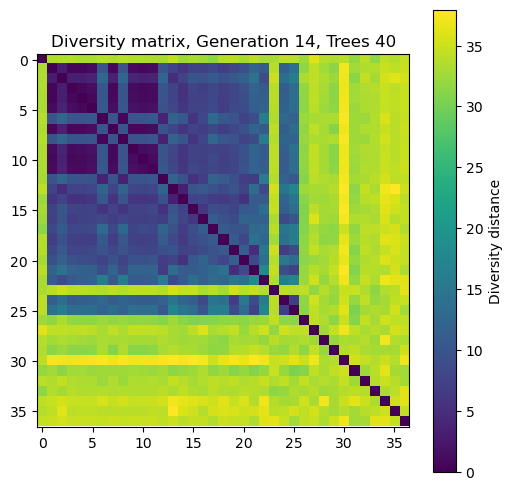

Generation 15, Trees 40, Best cost: 0.00283056, Est: 0.00707639, h: 3.810000


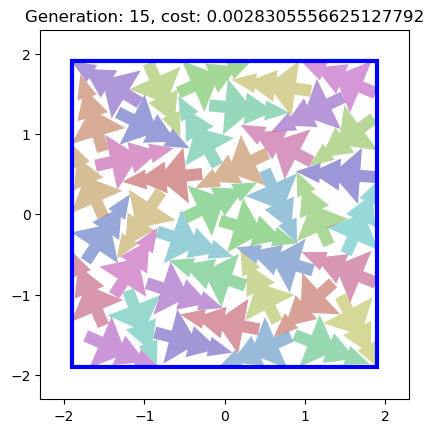

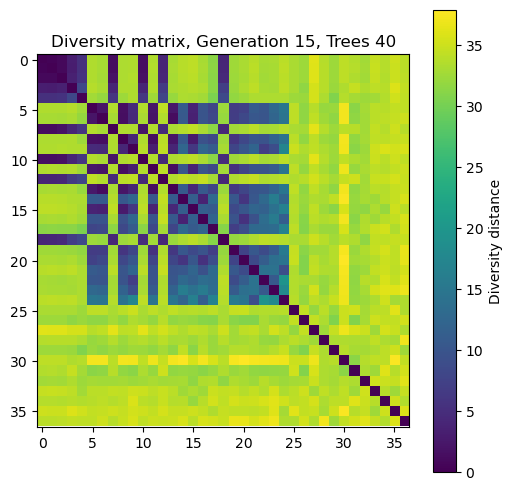

Generation 16, Trees 40, Best cost: 0.00276990, Est: 0.00692476, h: 3.810000


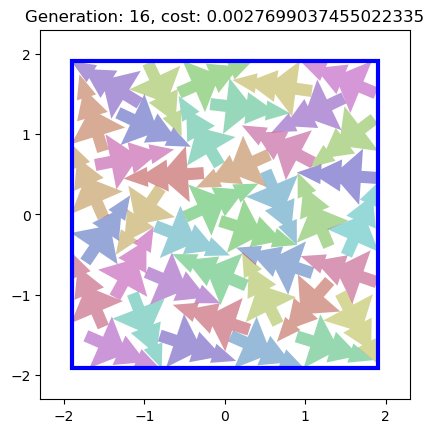

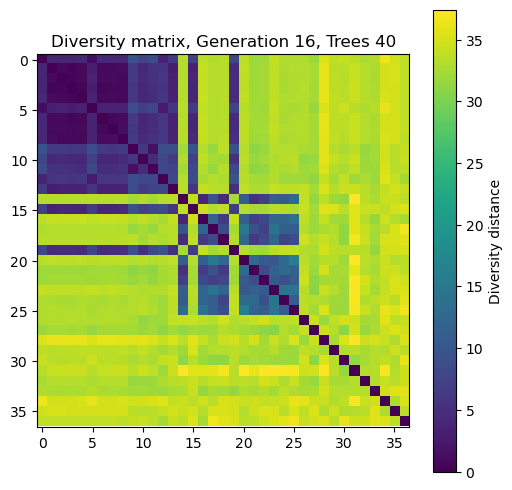

Generation 17, Trees 40, Best cost: 0.00254361, Est: 0.00635903, h: 3.810000


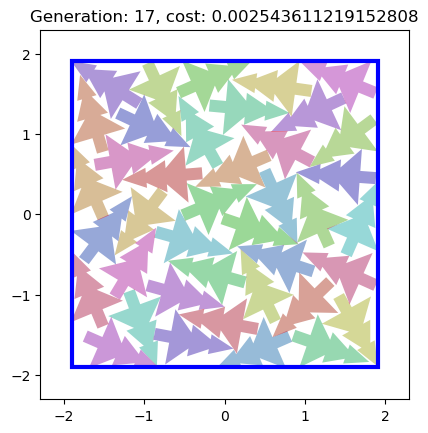

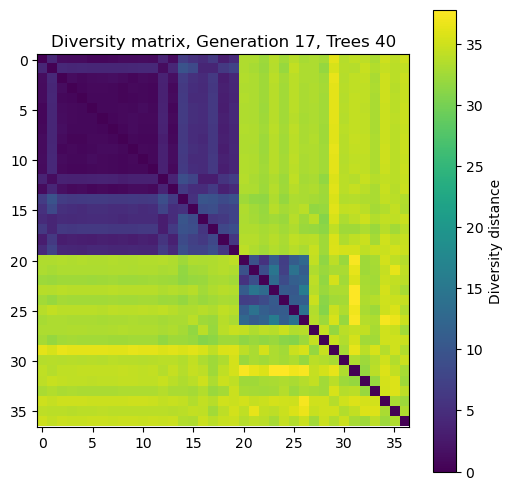

Generation 18, Trees 40, Best cost: 0.00250285, Est: 0.00625713, h: 3.810000


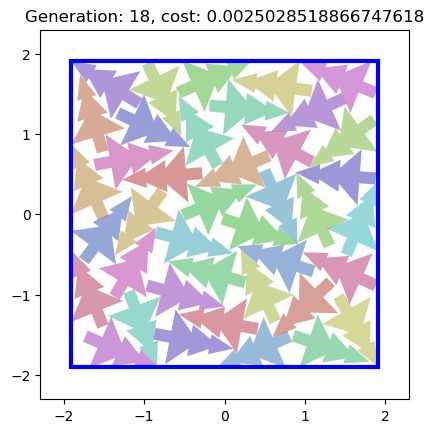

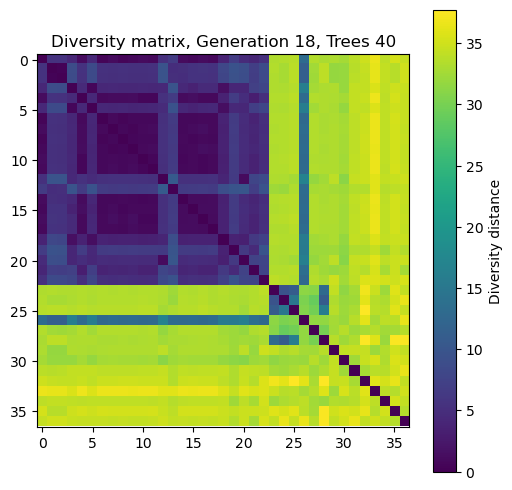

Generation 19, Trees 40, Best cost: 0.00241689, Est: 0.00604222, h: 3.810000


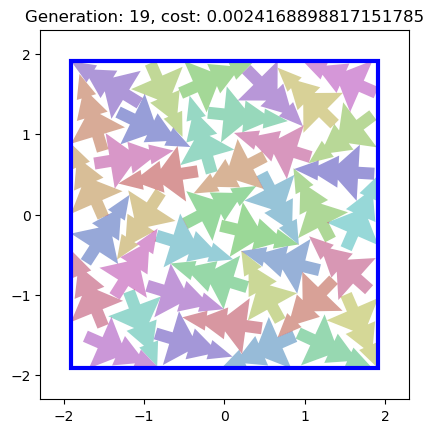

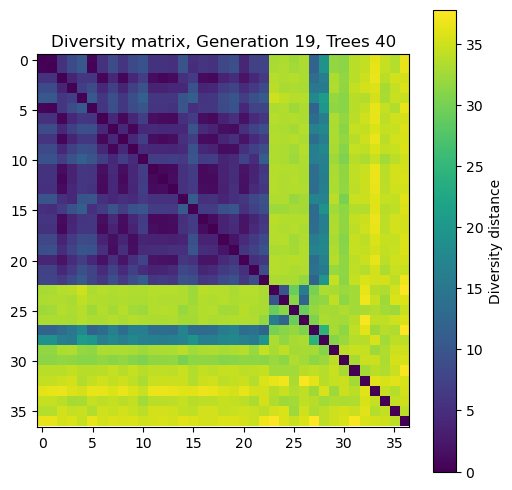

Generation 20, Trees 40, Best cost: 0.00226481, Est: 0.00566202, h: 3.810000


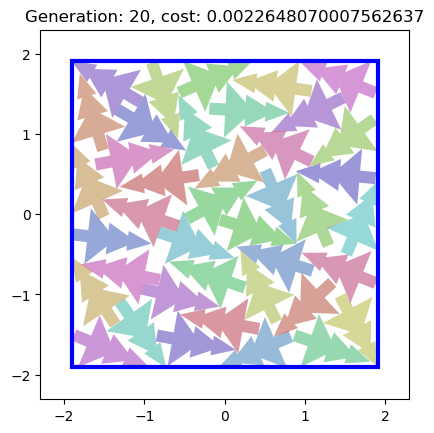

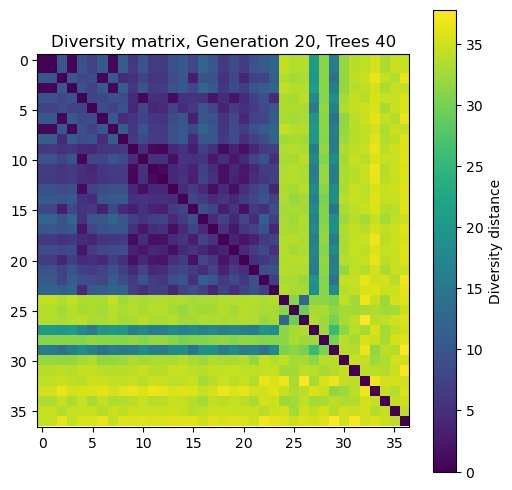

Generation 21, Trees 40, Best cost: 0.00214886, Est: 0.00537216, h: 3.810000


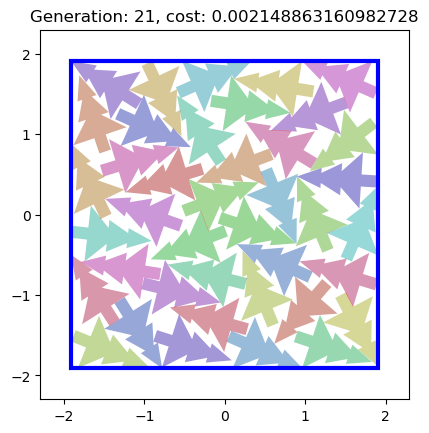

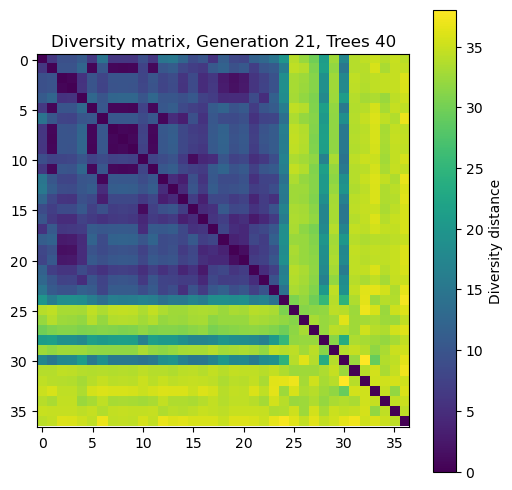

Generation 22, Trees 40, Best cost: 0.00200198, Est: 0.00500494, h: 3.810000


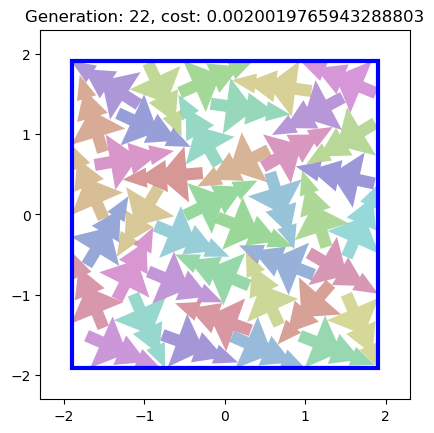

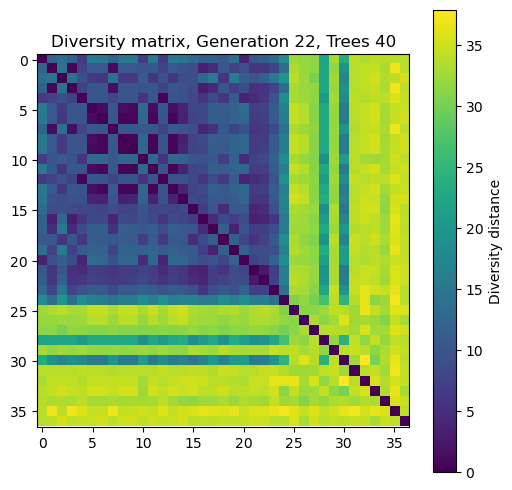

Generation 23, Trees 40, Best cost: 0.00181888, Est: 0.00454719, h: 3.810000


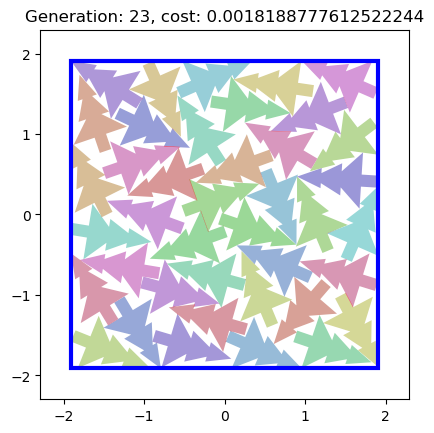

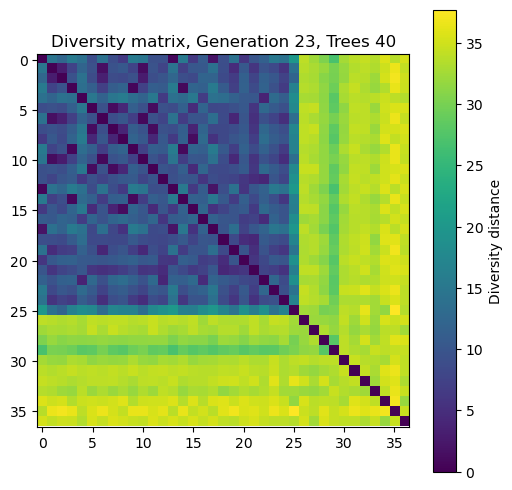

Generation 24, Trees 40, Best cost: 0.00170941, Est: 0.00427353, h: 3.810000


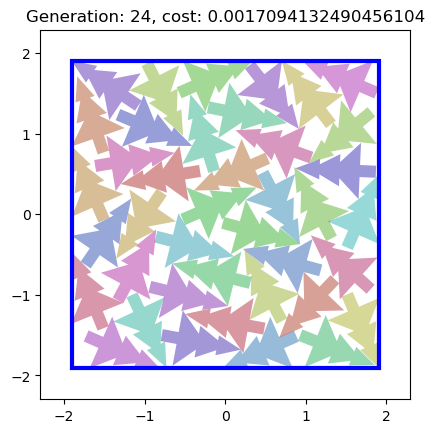

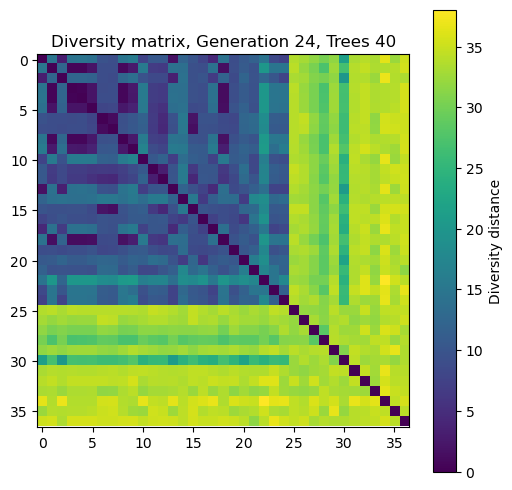

Generation 25, Trees 40, Best cost: 0.00133189, Est: 0.00332972, h: 3.810000


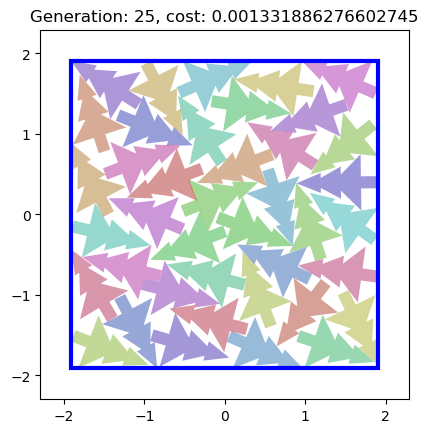

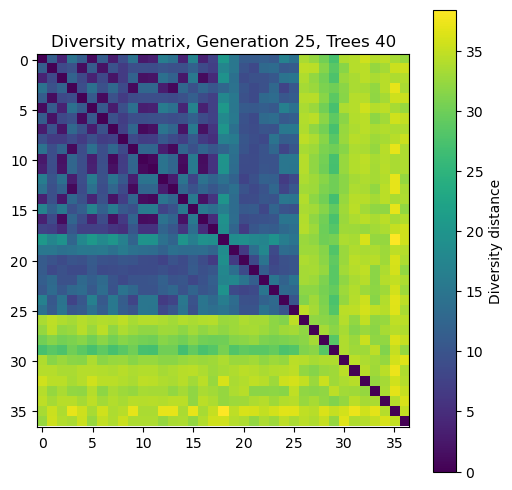

Generation 26, Trees 40, Best cost: 0.00115340, Est: 0.00288351, h: 3.810000


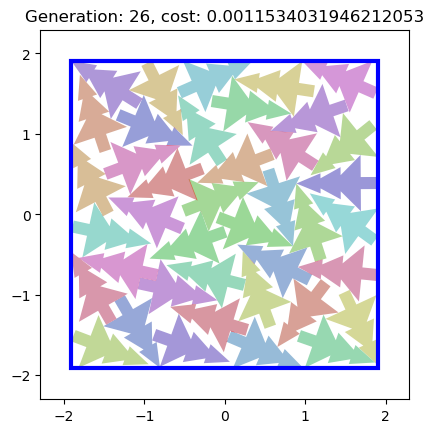

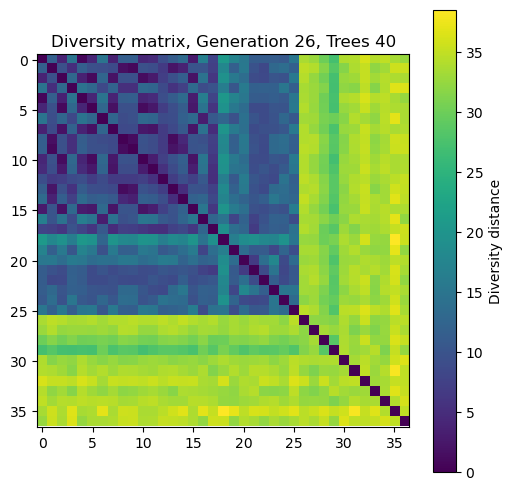

Generation 27, Trees 40, Best cost: 0.00103798, Est: 0.00259494, h: 3.810000


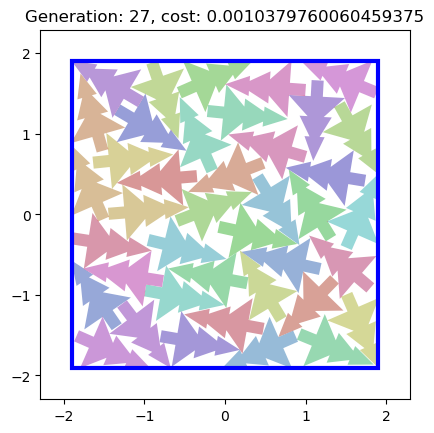

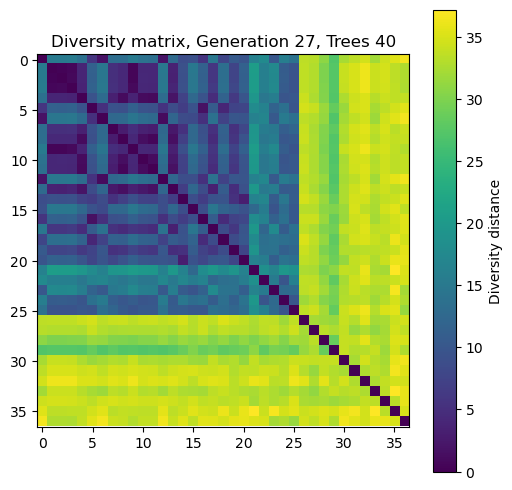

Generation 28, Trees 40, Best cost: 0.00091478, Est: 0.00228694, h: 3.810000


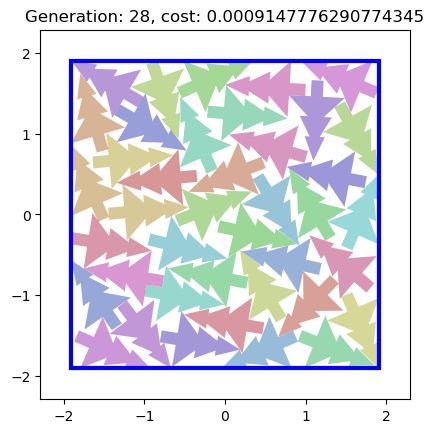

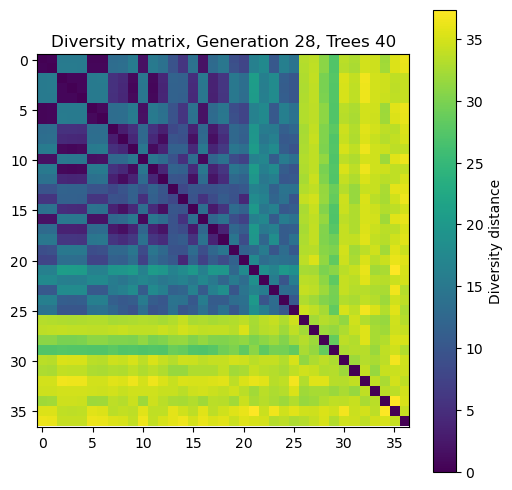

Generation 29, Trees 40, Best cost: 0.00085504, Est: 0.00213760, h: 3.810000


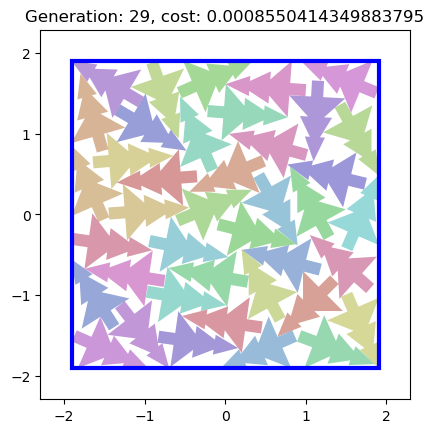

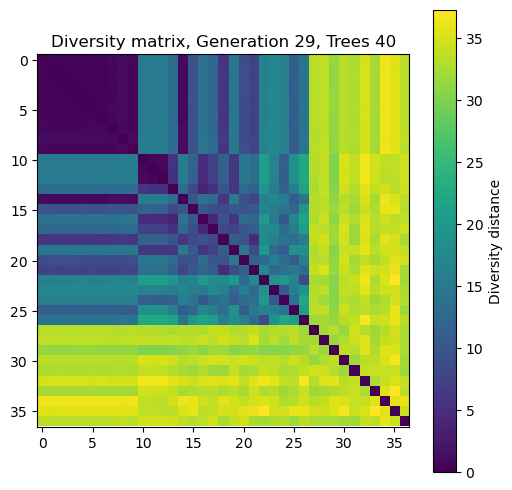

Generation 30, Trees 40, Best cost: 0.00083136, Est: 0.00207840, h: 3.810000


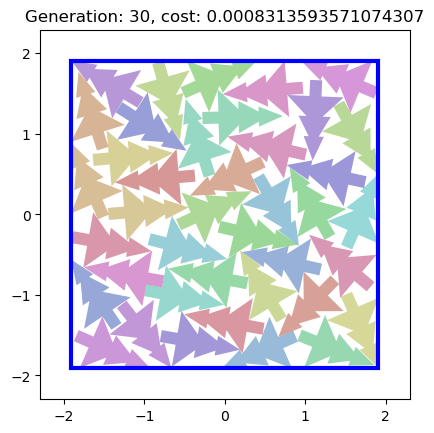

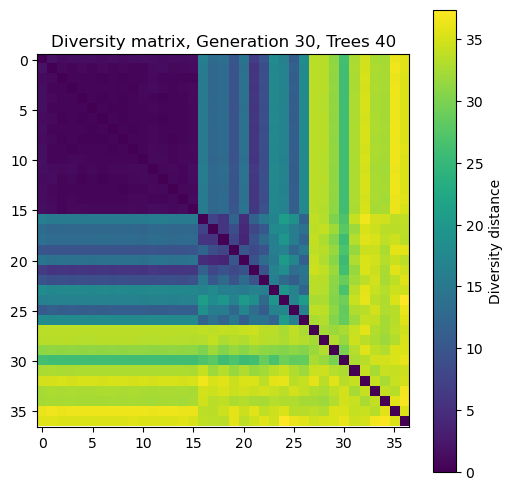

Generation 31, Trees 40, Best cost: 0.00065836, Est: 0.00164590, h: 3.810000


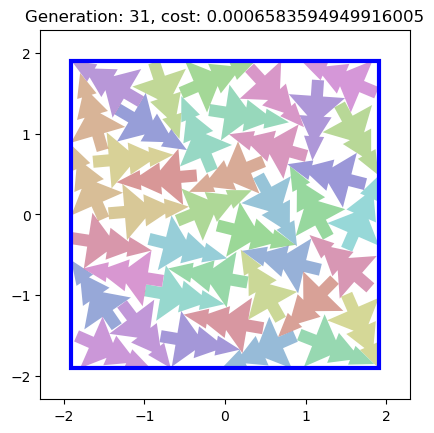

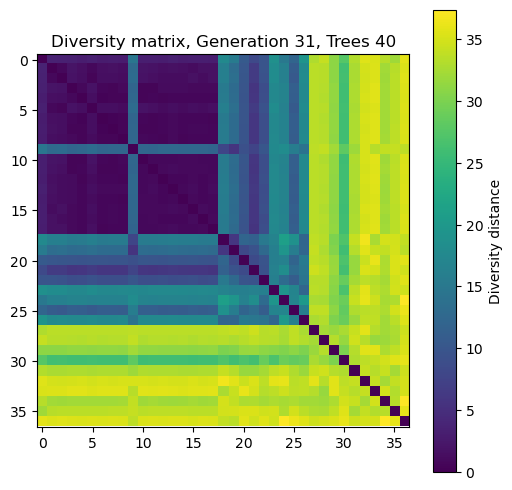

Generation 32, Trees 40, Best cost: 0.00058878, Est: 0.00147196, h: 3.810000


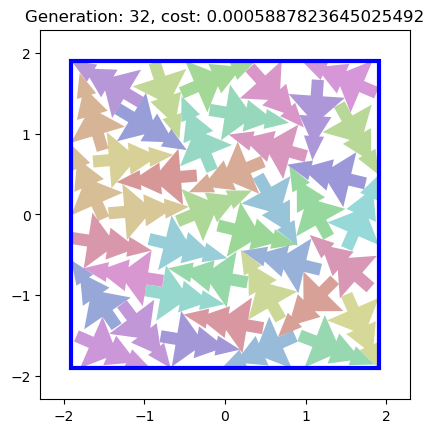

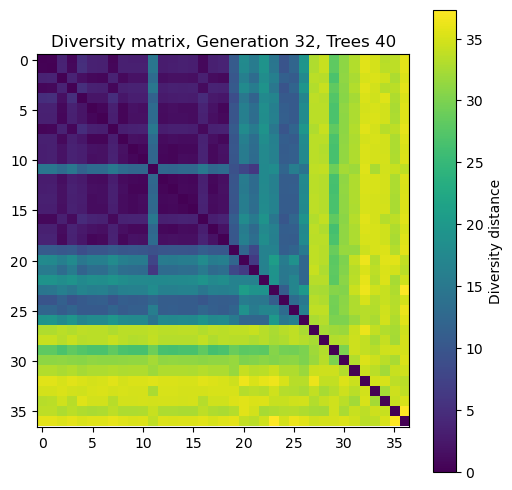

Generation 33, Trees 40, Best cost: 0.00052260, Est: 0.00130650, h: 3.810000


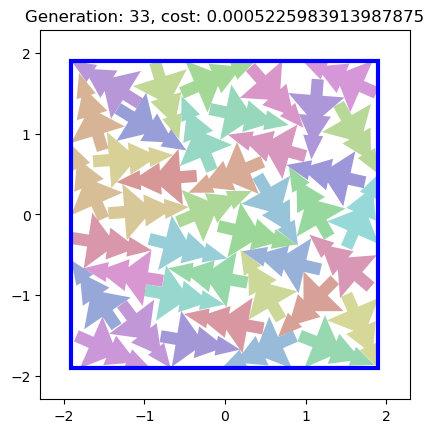

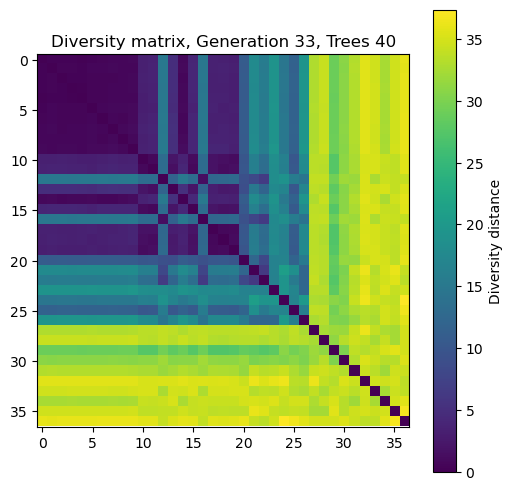

Generation 34, Trees 40, Best cost: 0.00049796, Est: 0.00124490, h: 3.810000


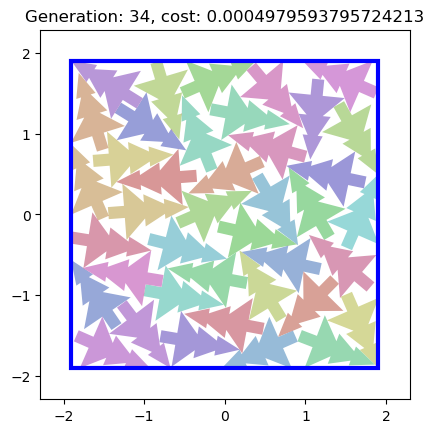

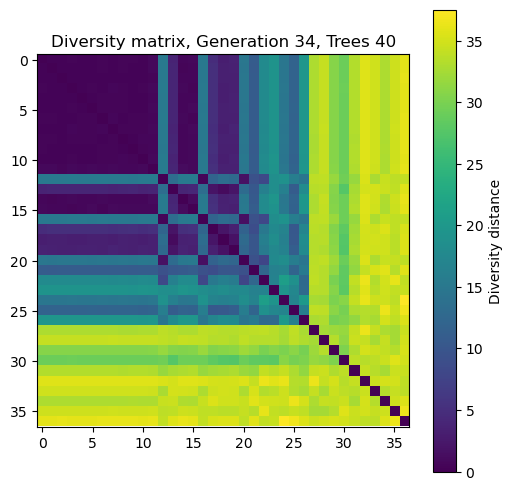

Generation 35, Trees 40, Best cost: 0.00048607, Est: 0.00121519, h: 3.810000


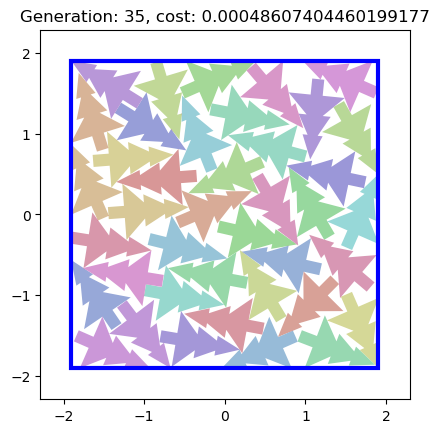

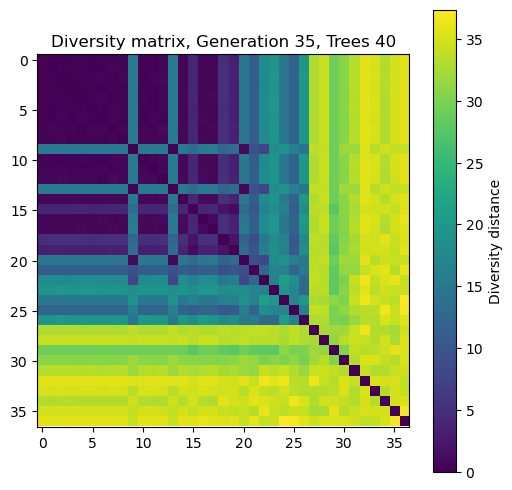

Generation 36, Trees 40, Best cost: 0.00048111, Est: 0.00120278, h: 3.810000


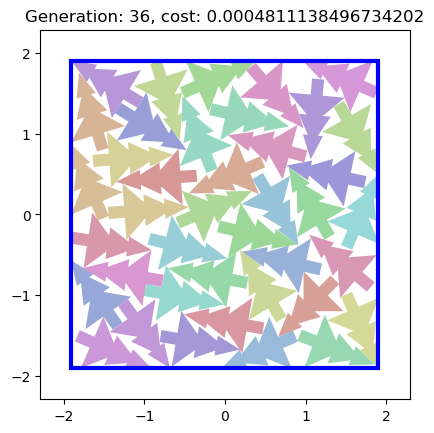

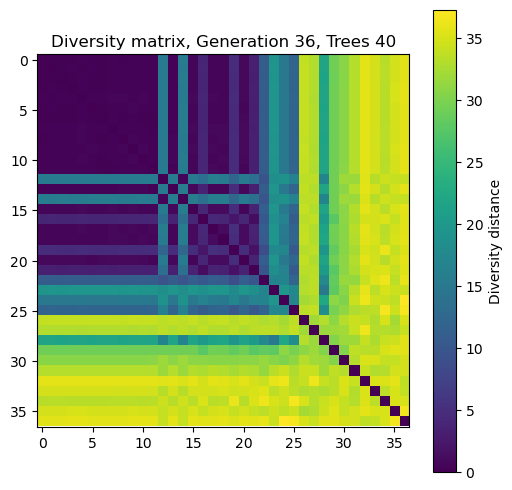

Generation 37, Trees 40, Best cost: 0.00045459, Est: 0.00113648, h: 3.810000


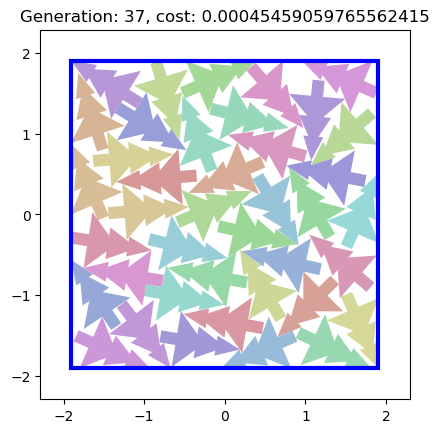

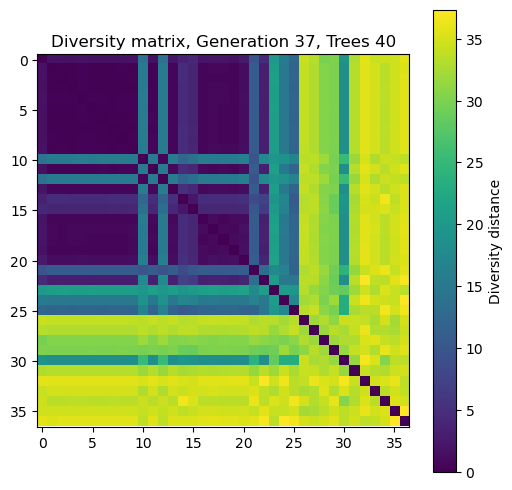

Generation 38, Trees 40, Best cost: 0.00040913, Est: 0.00102282, h: 3.810000


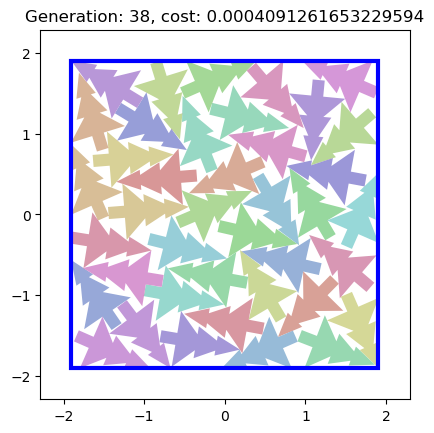

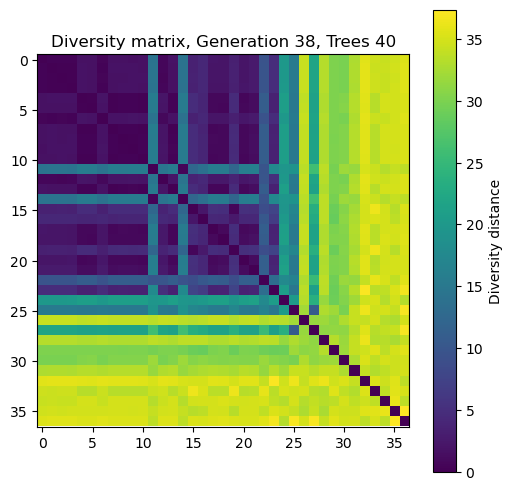

Generation 39, Trees 40, Best cost: 0.00040081, Est: 0.00100204, h: 3.810000


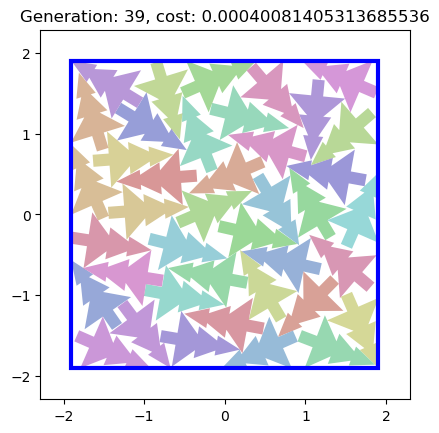

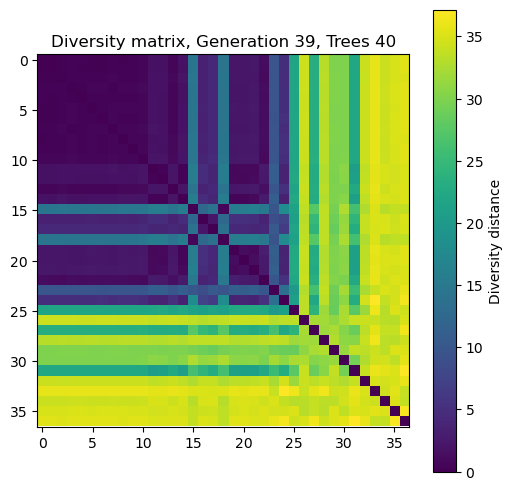

Generation 40, Trees 40, Best cost: 0.00039836, Est: 0.00099591, h: 3.810000


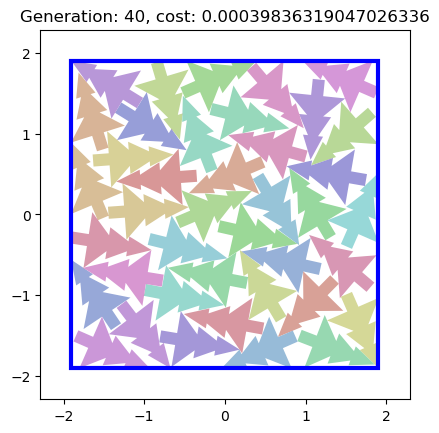

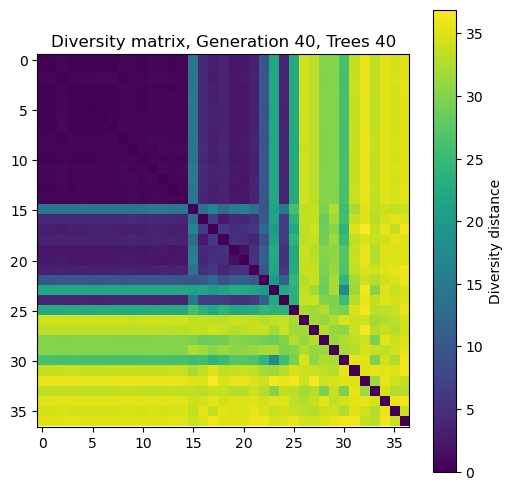

Generation 41, Trees 40, Best cost: 0.00039199, Est: 0.00097998, h: 3.810000


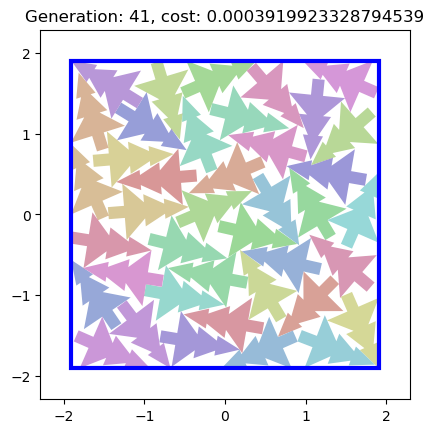

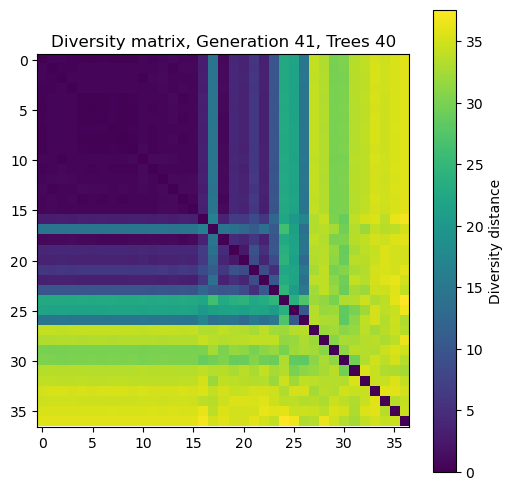

Generation 42, Trees 40, Best cost: 0.00038125, Est: 0.00095312, h: 3.810000


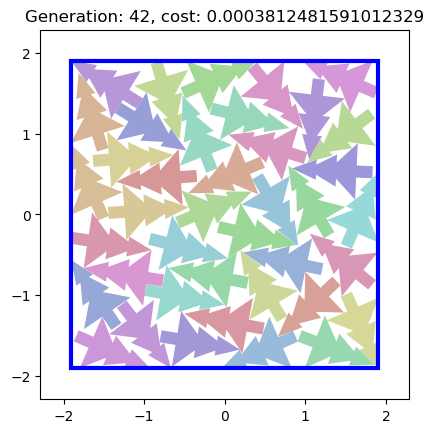

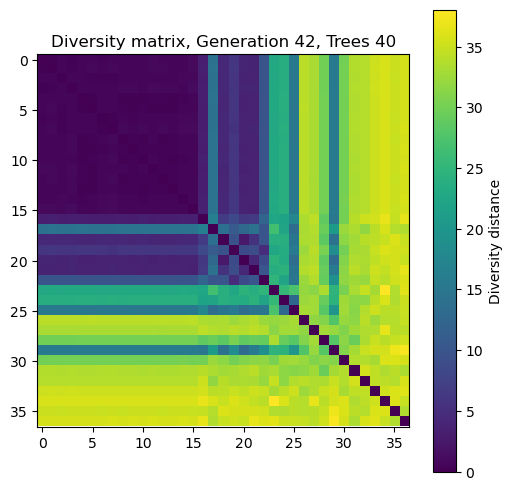

Generation 43, Trees 40, Best cost: 0.00037454, Est: 0.00093635, h: 3.810000


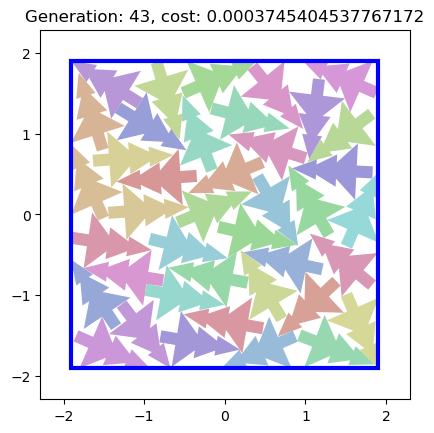

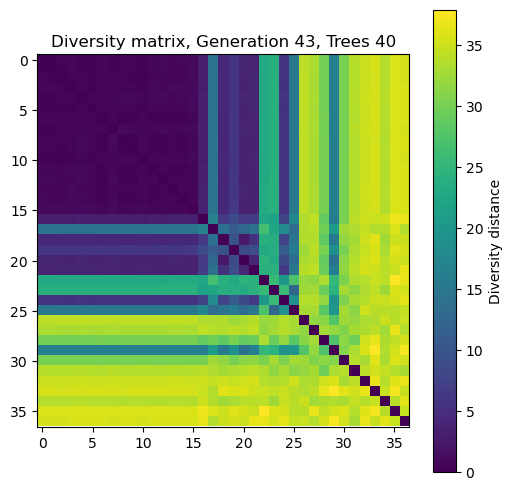

Generation 44, Trees 40, Best cost: 0.00036951, Est: 0.00092377, h: 3.810000


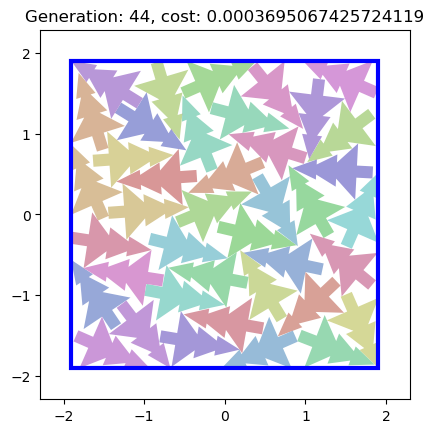

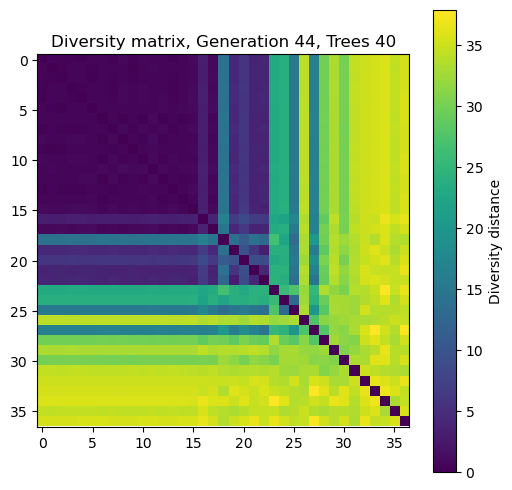

Generation 45, Trees 40, Best cost: 0.00036951, Est: 0.00092377, h: 3.810000


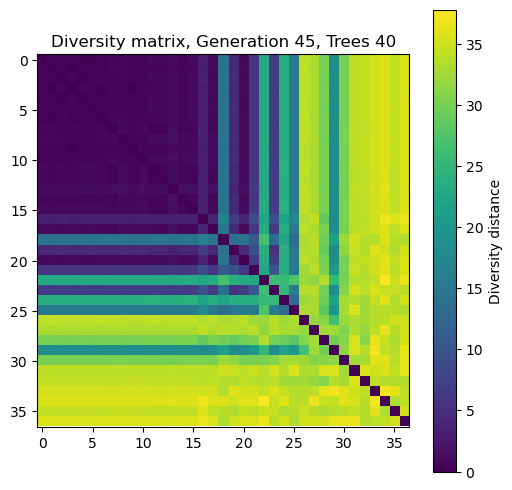

Generation 46, Trees 40, Best cost: 0.00036588, Est: 0.00091469, h: 3.810000


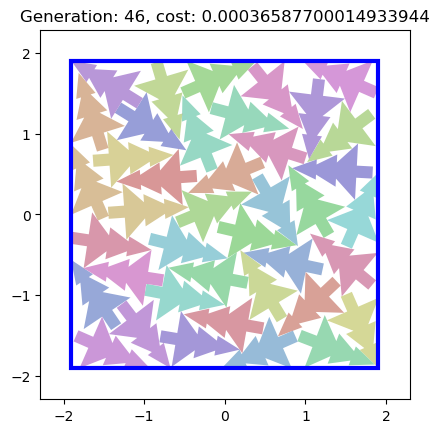

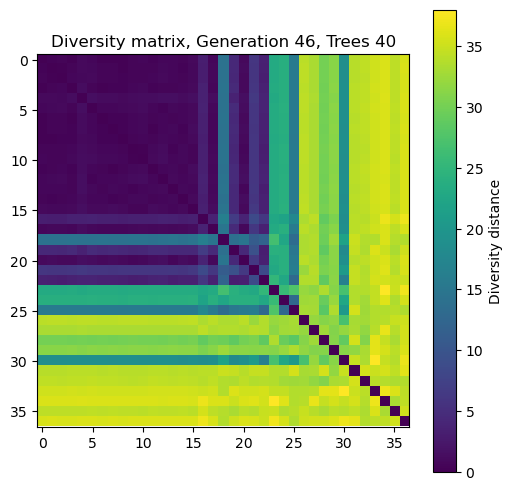

Generation 47, Trees 40, Best cost: 0.00036337, Est: 0.00090843, h: 3.810000


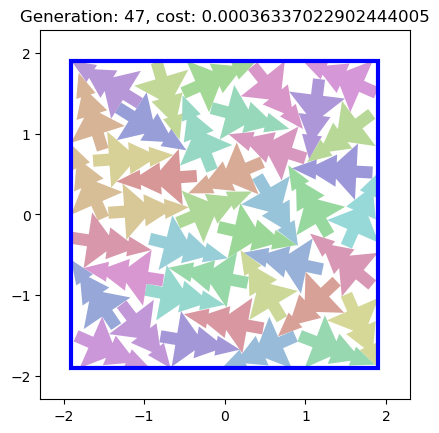

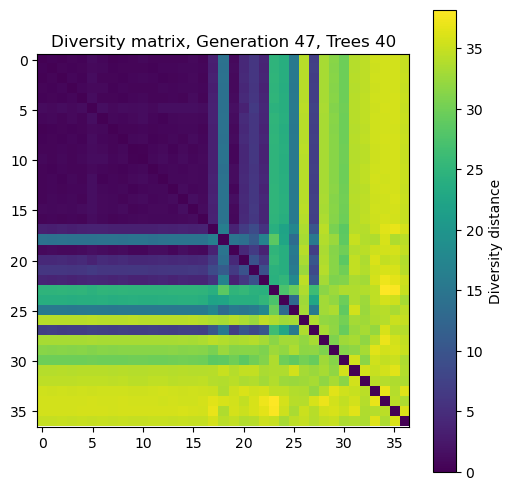

Generation 48, Trees 40, Best cost: 0.00036227, Est: 0.00090567, h: 3.810000


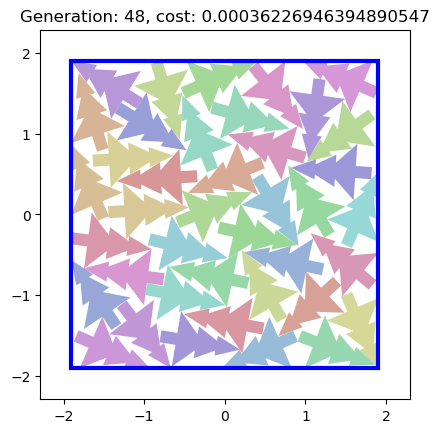

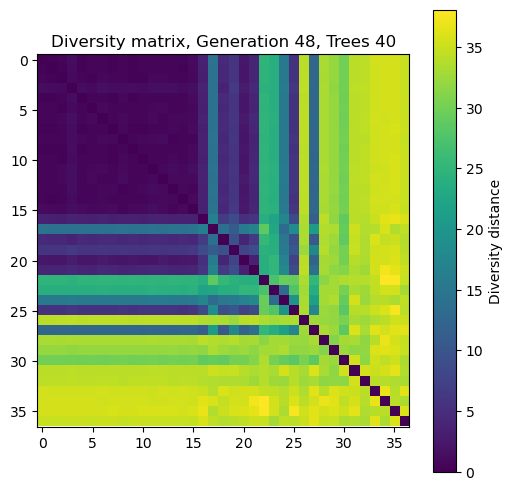

Generation 49, Trees 40, Best cost: 0.00036194, Est: 0.00090485, h: 3.810000


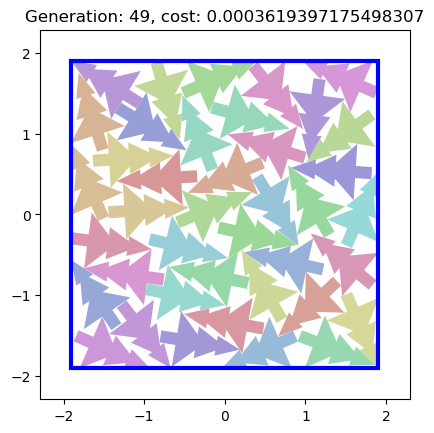

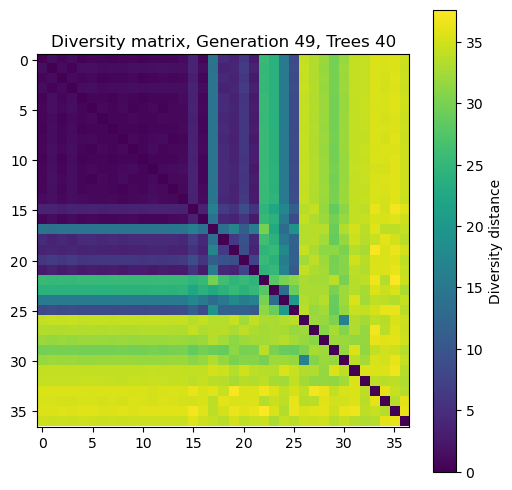

Generation 50, Trees 40, Best cost: 0.00034242, Est: 0.00085606, h: 3.810000


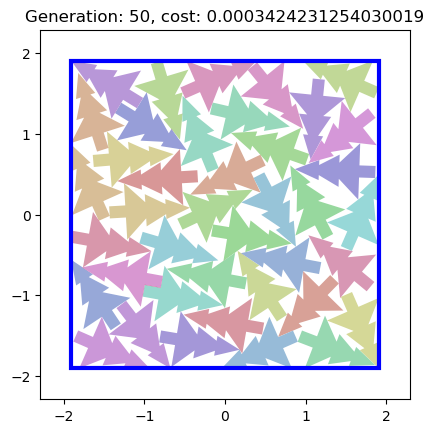

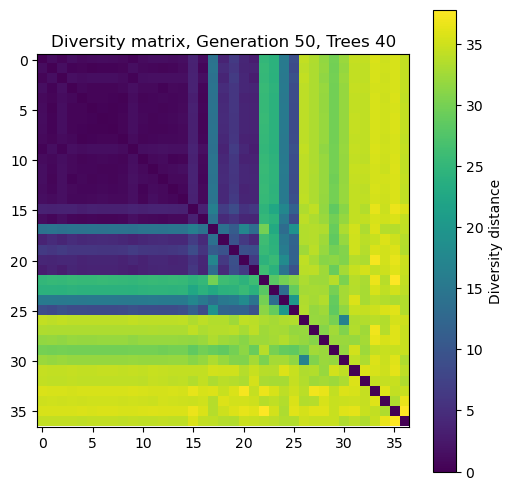

Generation 51, Trees 40, Best cost: 0.00034006, Est: 0.00085014, h: 3.810000


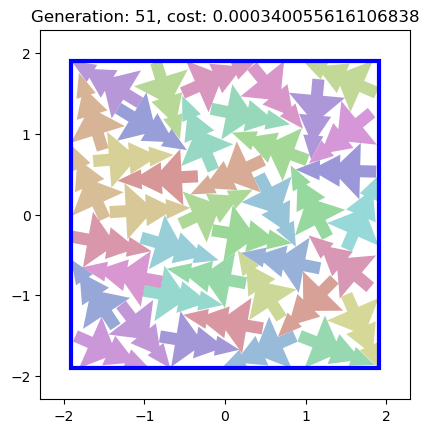

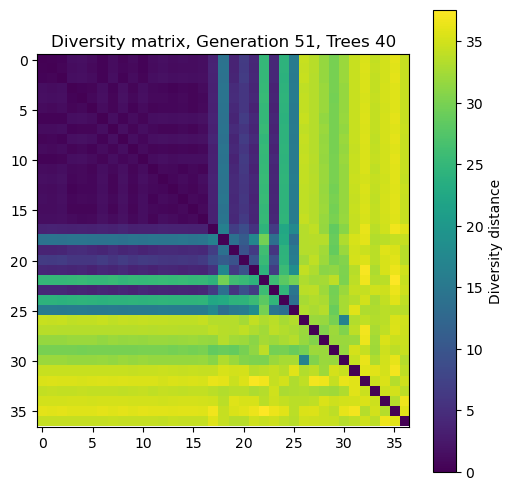

Generation 52, Trees 40, Best cost: 0.00034006, Est: 0.00085014, h: 3.810000


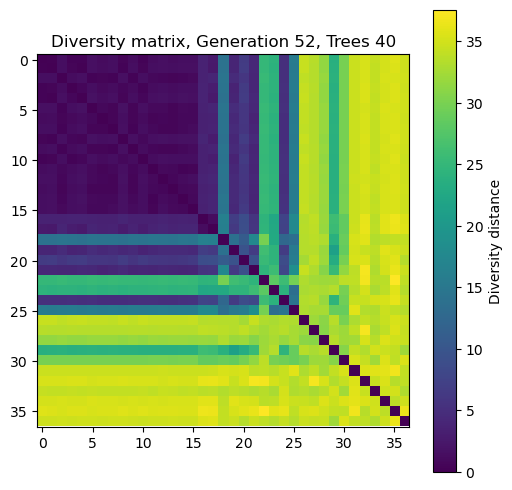

Generation 53, Trees 40, Best cost: 0.00034006, Est: 0.00085014, h: 3.810000


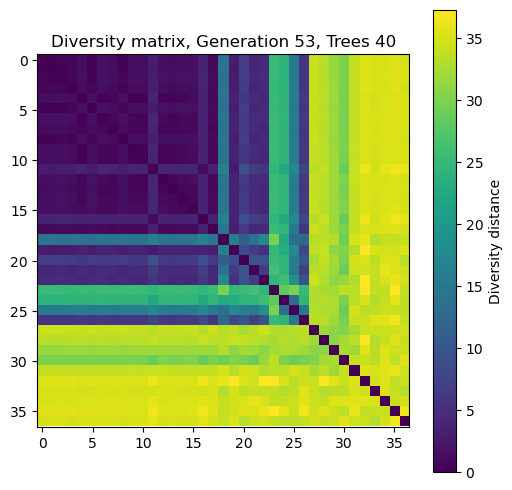

Generation 54, Trees 40, Best cost: 0.00033604, Est: 0.00084011, h: 3.810000


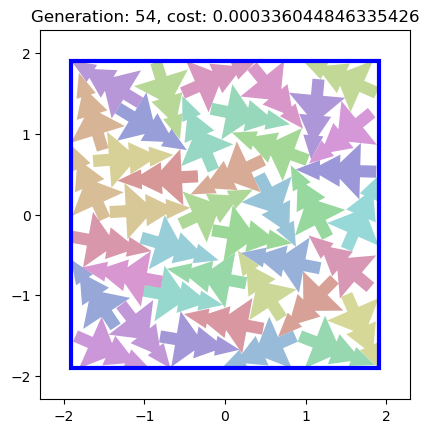

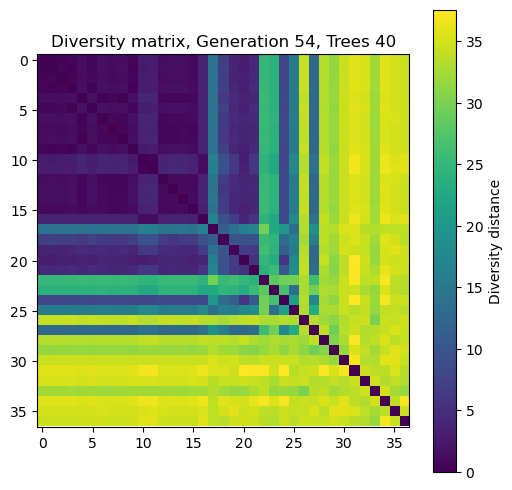

Generation 55, Trees 40, Best cost: 0.00033604, Est: 0.00084011, h: 3.810000


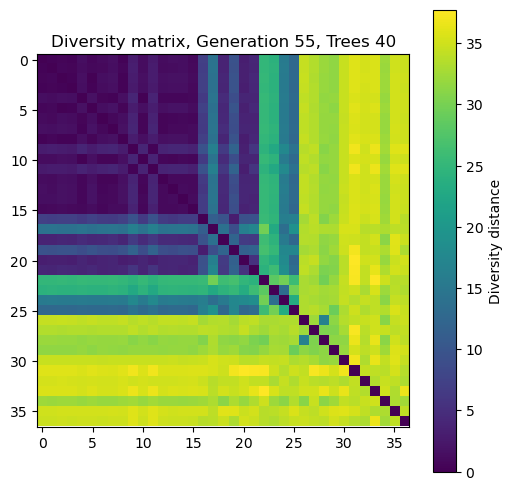

Generation 56, Trees 40, Best cost: 0.00033604, Est: 0.00084011, h: 3.810000


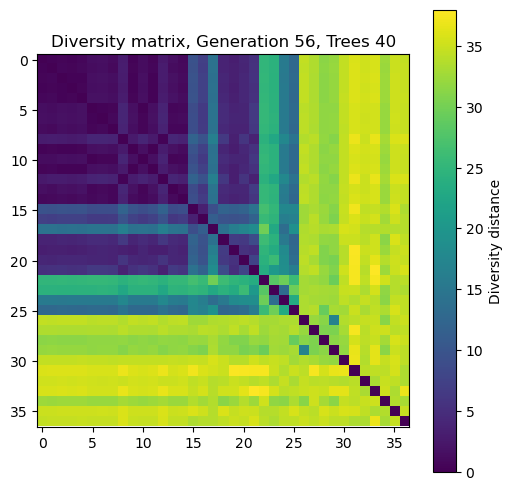

Generation 57, Trees 40, Best cost: 0.00033604, Est: 0.00084011, h: 3.810000


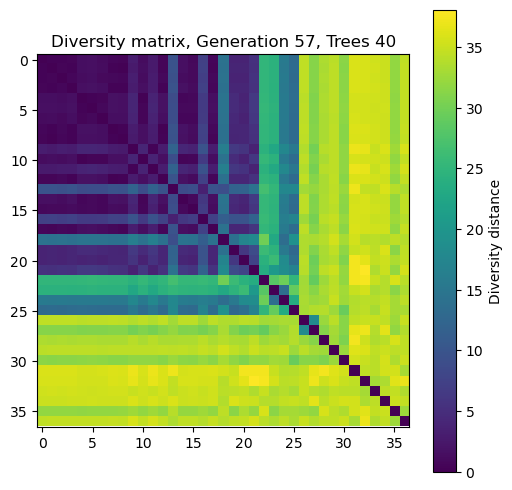

In [ ]:
import pack_runner
fastMode = False
runner = pack_runner.baseline_runner(fast_mode=False)

runner.base_ga.N_trees_to_do = np.array([40])
runner.base_ga.plot_fitness_predictors = False
runner.base_ga.plot_diversity_matrix = True
runner.base_ga.plot_champions = True

#runner.modifier_dict['set_used_fixed_h'] = pack_runner.pm(False, lambda r:r.choice([False]), pack_runner.set_used_fixed_h)
runner.modifier_dict['set_fixed_h'] = pack_runner.pm(3.7, lambda r:r.uniform(3.81,3.81), pack_runner.set_fixed_h)
#runner.modifier_dict['reduce_h_amount'] = pack_runner.pm(1e-3, lambda r:r.uniform(1e-2, 2e-2), pack_runner.set_ga_prop)
kgs.profiling=False
runner.run()

In [ ]:
runner.result_ga.best_cost_per_generation

In [ ]:
kgs.dill_save(kgs.code_dir+'../../results/test_ga_result_ga.dill',runner.result_ga)